#### COMPARAÇÃO DO CONTROLE PI COM O ENSAIO DE ONDA QUADRADA
**<center>Universidade Federal do Pará</center>**

**Relatório 06**

**Curso:** Engenharia Elétrica

**Disciplina:** Laboratório De Sistemas De Controle

**Docente:** Cleison Daniel Silva

**Discentes:** 

Hilda Beatriz Viana De Oliveira - 201933940028

Ivanildo dos Santos Bento - 201833940019      

Natã Nazareno Brito Barbosa - 201933940016

Cidade: Tucuruí/PA              
    
Turma: 2019

Pelo projeto feito com base no método de Ziegler Nichols, os valores de :
$$
\begin{align*}
K_p = 1.35 = K_c \\

a = \frac{K_i}{K_p} = \frac{10.38}{1.35} = 7.68

\end{align*}
$$
Porem, quando o controlador foi implementado na bancada, observou-se que ele era lento para o sistema e o numero de amostras como a frequência foram alteradas para que ele atingisse erro em regime permanente, mas alterando essas parâmetros estavamos alterando a planta do sistema, não o controlador.

Com base na observação, foram feitos ajustes na simulação para que o desempenho do controlador atingisse as especificações de um bom projeto (como erro nulo em regime permanente), para conseguir executar esses ajustes finos, foram refeitas o projeto do ganho variando com a simulação o valor e refazendo o calculo para se achar o 'a', com isso a melhor resposta obtida, com o controlador funcionando mais rápido os valores utilizados foram:


$$
\begin{align*}
K_p = 1.50 = K_c \\
K_i = \frac{K_p}{\tau_i} = \frac{1.50}{0.13} = 11,53 \\

a = \frac{K_i}{K_p} = \frac{11.53}{1.50} = 7.69

\end{align*}
$$
Sendo que $K_c$ = $K_p$ = $PI$



In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import control as ct


In [27]:
#Função discretizada tilizada no código de implementação
Kpi = 1.50
Ts = 0.02
a = 7.69
Gzc = ct.tf([Kpi,Kpi*a],[1,0])
print(Gzc)

Gzd = ct.c2d(Gzc,Ts,'tustin')
print(Gzd)


1.5 s + 11.54
-------------
      s


1.615 z - 1.385
---------------
     z - 1

dt = 0.02



In [28]:
path = "C:/Users/User/Documents/2023.2/Laboratório de Controle/relatório_6/"
ddS = pd.read_csv(path + "dadosPI.csv", sep=';')

In [29]:
x1 = ddS.to_numpy()
t = np.array(x1[:,0])

In [30]:
x1 = ddS.to_numpy()
h = 100
t = np.array(x1[h:,0])
si_entrada = np.array(x1[h:,1])
si_saida = np.array(x1[h:,2])
toc = np.array(x1[h:,2])
len(t)

699

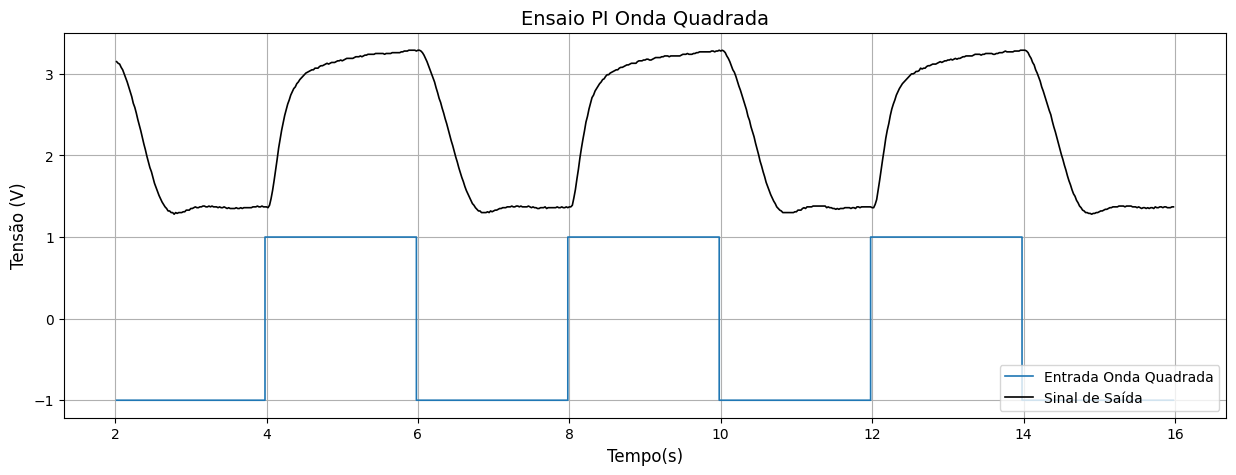

In [31]:
# Configura o tamanho da figura
plt.figure(figsize=(15,5))

# Plota o gráfico de entrada
plt.plot(t, si_entrada, drawstyle="steps", linewidth=1.2)

# Plota o gráfico de saída
plt.plot(t, si_saida, color='k',linewidth=1.2)

# Configura o rótulo do eixo x
plt.xlabel('Tempo(s)', fontsize=12)

# Configura o rótulo do eixo y
plt.ylabel('Tensão (V)', fontsize=12)

# Configura o título
plt.title('Ensaio PI Onda Quadrada', fontsize=14)

# Configura a legenda
plt.legend(loc='lower right', labels=('Entrada Onda Quadrada','Sinal de Saída'))

# Configura a grade do gráfico
plt.grid(True)

# Mostra o gráfico gerado
plt.show()

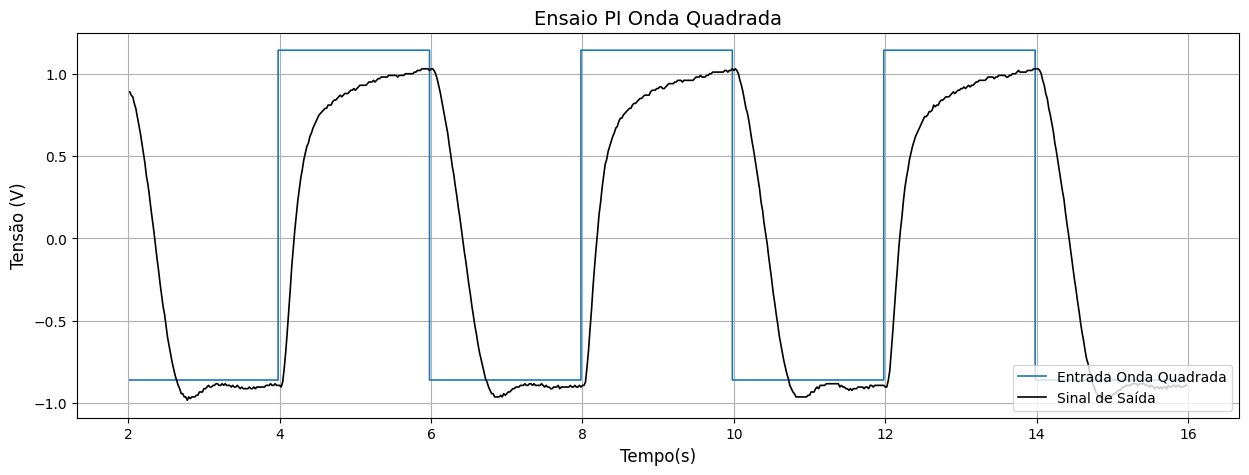

In [32]:
# Configura o tamanho da figura
plt.figure(figsize=(15,5))

# Plota o gráfico de entrada
plt.plot(t, si_entrada-np.mean(si_entrada), drawstyle="steps", linewidth=1.2)
# plt.plot(t, si_entrada, drawstyle="steps", linewidth=1.2)

# Plota o gráfico de saída
plt.plot(t, si_saida-np.mean(si_saida), color='k',linewidth=1.2)

# Configura o rótulo do eixo x
plt.xlabel('Tempo(s)', fontsize=12)

# Configura o rótulo do eixo y
plt.ylabel('Tensão (V)', fontsize=12)

# Configura o título
plt.title('Ensaio PI Onda Quadrada', fontsize=14)

# Configura a legenda
plt.legend(loc='lower right', labels=('Entrada Onda Quadrada','Sinal de Saída'))

# Configura a grade do gráfico
plt.grid(True)

# Mostra o gráfico gerado
plt.show()

Apesar dos ajustes finos feitos no projeto do controlador, o sinal de saída ainda apresenta erro em regime permanente, o controlador não alcança as determinações do projeto pois a planta é um modelo de terceira ordem, onde o controle necessario para atingir as expecificções seria um PID, para com a parte derivativa considerar a taxa de variação de erro e trabalhar em conjunto com o proporcional integral para ajustar o sinal de ontrole e alcançar a resposta desejada. 